<a href="https://colab.research.google.com/github/Izuho/Quantum/blob/main/Oslo_Star.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit

     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 4.0 MB 34.1 MB/s 
     |████████████████████████████████| 112 kB 58.5 MB/s 
  Created wheel for qiskit: filename=qiskit-0.36.2-py3-none-any.whl size=11933 sha256=463d24525a6b2483d0abfe64798f71cf86dbd014a44c0fc6cafdc3e63960c688
  Stored in directory: /root/.cache/pip/wheels/36/f7/83/e2755ad17aa35bc145fce34e184aaf394a265a978d95caaabf
  Created wheel for python-constraint: filename=python_constraint-1.4.0-py2.py3-none-any.whl size=24081 sha256=daf2e491fad2f88adbad41cd878421550323c918b848d62523000cfd183fc396
  Stored in directory: /root/.cache/pip/wheels/07/27/db/1222c80eb1e431f3d2199c12569cb1cac60f562a451fe30479
Successfully built qiskit python-constraint
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that a

In [7]:
#必要なモジュールのインポート
from qiskit import IBMQ, QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, Aer
from math import pi, sqrt
from qiskit.tools.visualization import plot_histogram, circuit_drawer
import numpy as np

In [8]:
# 自分のアカウント情報をloadする。（あらかじめ IBMQ.save_account を実行しておく必要がある. 複数のアカウントを使い分ける時はここで行う)
IBMQ.save_account('049473bee5997f5654ebf971e38cd79c5bff10efd159418702ccdff5887362c90734087d95541c44b74de5822218e64ead6d741baab2056ae65d544af6eba8b3')
provider = IBMQ.load_account()

In [9]:
backend = provider.get_backend('ibm_oslo')

In [10]:
def make_stab_star6(point):

    # make unitary matrix to compute expected value G
    unitary = None
    if point == 0:
        unitary = QuantumCircuit(6)
        unitary.x(5)
        for i in range(5):
            unitary.z(i)
        unitary = unitary.to_gate().control()
    elif 1 <= point and point <= 5:
        unitary = QuantumCircuit(2)
        unitary.z(0)
        unitary.x(1)
        unitary = unitary.to_gate().control()
    else:
        raise Exception('OUT of BOUNDS!')

    qc = QuantumCircuit()
    qr = QuantumRegister(7)
    qc.add_register(qr)
    qc.h(qr[3])
    qc.cx(qr[3],qr[1])
    qc.cx(qr[1],qr[2])
    qc.cx(qr[1],qr[0])
    qc.cx(qr[3],qr[5])
    qc.cx(qr[5],qr[4])
    for i in range(1, 7, 1): 
        qc.h(qr[i])


    if point == 0:
        qc.append(unitary, qr[6::-1])
        qc.h(qr[6])
    else:
        qc.append(unitary, [qr[6], qr[0], qr[point]])
        qc.h(qr[6])

    cr = ClassicalRegister(1,'creg')
    qc.add_register(cr)
    qc.measure(qr[6],cr[0])

    return qc

In [5]:
circ = make_stab_star6(1)
circ.draw()

┌───┐     ┌─────────────┐        
  q1_0: ───────────────┤ X ├─────┤0            ├────────
             ┌───┐     └─┬─┘┌───┐│  circuit-14 │        
  q1_1: ─────┤ X ├──■────■──┤ H ├┤1            ├────────
             └─┬─┘┌─┴─┐┌───┐└───┘└──────┬──────┘        
  q1_2: ───────┼──┤ X ├┤ H ├────────────┼───────────────
        ┌───┐  │  └───┘├───┤            │               
  q1_3: ┤ H ├──■────■──┤ H ├────────────┼───────────────
        └───┘       │  ├───┤┌───┐       │               
  q1_4: ────────────┼──┤ X ├┤ H ├───────┼───────────────
                  ┌─┴─┐└─┬─┘├───┤       │               
  q1_5: ──────────┤ X ├──■──┤ H ├───────┼───────────────
        ┌───┐     └───┘     └───┘       │       ┌───┐┌─┐
  q1_6: ┤ H ├───────────────────────────■───────┤ H ├┤M├
        └───┘                                   └───┘└╥┘
creg: 1/══════════════════════════════════════════════╩═
                                                      0

In [11]:
ans = 0

circ = make_stab_star6(0)
result = execute(circ, backend, shots=4096).result()
#結果を出力する。
hist = result.get_counts(circ)
print(hist)
#結果のヒストグラムを描画する。
plot_histogram(hist)
ratio = None
if hist.get('1') == None:
    ratio = 1
else:
    ratio = (hist['0']-hist['1'])/(hist['0']+hist['1'])
ans += sqrt(2) * 5 * ratio

{'0': 1988, '1': 2108}


{'0': 4096}


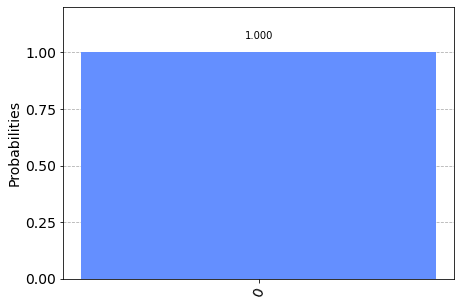

In [14]:
circ = make_stab_star6(0)
emulator = Aer.get_backend('qasm_simulator')
result = execute(circ, emulator, shots=4096).result()
#結果を出力する。
hist = result.get_counts(circ)
print(hist)
#結果のヒストグラムを描画する。
plot_histogram(hist)

In [ ]:
circ = make_stab_star6(1)
result = execute(circ, backend, shots=4096).result()
#結果を出力する。
hist = result.get_counts(circ)
print(hist)
#結果のヒストグラムを描画する。
plot_histogram(hist)
ratio = None
if hist.get('1') == None:
    ratio = 1
else:
    ratio = (hist['0']-hist['1'])/(hist['0']+hist['1'])
ans += sqrt(2) * ratio

In [ ]:
circ = make_stab_star6(2)
result = execute(circ, backend, shots=4096).result()
#結果を出力する。
hist = result.get_counts(circ)
print(hist)
#結果のヒストグラムを描画する。
plot_histogram(hist)
ratio = None
if hist.get('1') == None:
    ratio = 1
else:
    ratio = (hist['0']-hist['1'])/(hist['0']+hist['1'])
ans += sqrt(2) * ratio

In [ ]:
circ = make_stab_star6(3)
result = execute(circ, backend, shots=4096).result()
#結果を出力する。
hist = result.get_counts(circ)
print(hist)
#結果のヒストグラムを描画する。
plot_histogram(hist)
ratio = None
if hist.get('1') == None:
    ratio = 1
else:
    ratio = (hist['0']-hist['1'])/(hist['0']+hist['1'])
ans += sqrt(2) * ratio

In [ ]:
circ = make_stab_star6(4)
result = execute(circ, backend, shots=4096).result()
#結果を出力する。
hist = result.get_counts(circ)
print(hist)
#結果のヒストグラムを描画する。
plot_histogram(hist)
ratio = None
if hist.get('1') == None:
    ratio = 1
else:
    ratio = (hist['0']-hist['1'])/(hist['0']+hist['1'])
ans += sqrt(2) * ratio

In [ ]:
circ = make_stab_star6(5)
result = execute(circ, backend, shots=4096).result()
#結果を出力する。
hist = result.get_counts(circ)
print(hist)
#結果のヒストグラムを描画する。
plot_histogram(hist)
ratio = None
if hist.get('1') == None:
    ratio = 1
else:
    ratio = (hist['0']-hist['1'])/(hist['0']+hist['1'])
ans += sqrt(2) * ratio